<a href="https://colab.research.google.com/github/Spyrx4/analisis_sentimen_merahputih_oneforall/blob/main/notebook/Proses_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import nltk
import html

In [2]:
df = pd.read_csv('smerahputih_oneforall.csv')

In [3]:
df.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment


In [4]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment
...,...,...,...,...,...
4751,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
4752,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
4753,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
4754,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [5]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


# Pisahkan menjadi dua kolom: tanggal dan waktu
df['tanggal'] = df['publishedAt'].dt.date
df['jam'] = df['publishedAt'].dt.time

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        4756 non-null   datetime64[ns, UTC]
 1   authorDisplayName  4756 non-null   object             
 2   textDisplay        4756 non-null   object             
 3   likeCount          4756 non-null   int64              
 4   type               4756 non-null   object             
 5   tanggal            4756 non-null   object             
 6   jam                4756 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 260.2+ KB


In [7]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

In [8]:
df['username'] = df['authorDisplayName'].apply(clean_text)

In [9]:
df  = pd.DataFrame(df[['tanggal','jam','username','textDisplay','likeCount']])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4756 non-null   object
 1   jam          4756 non-null   object
 2   username     4756 non-null   object
 3   textDisplay  4756 non-null   object
 4   likeCount    4756 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 185.9+ KB


In [11]:
# melihat data duplicate
df[df.duplicated(subset='textDisplay')]

,tanggal,jam,username,textDisplay,likeCount
47,2025-08-27,14:08:06,yoiki_kolip,Bajet miliarran grafik 80 an,0
234,2025-08-25,14:38:04,kutufilem,itu mau peramg apa gimana kok ada ak47 di gudang,0
254,2025-08-25,12:24:33,viovirza,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
323,2025-08-24,21:22:28,juragangabah-m8b,👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎,0
407,2025-08-24,07:08:29,supplyoverload,Burik,0
...,...,...,...,...,...
4624,2025-08-11,06:20:58,iujenongg,"Bakalan abis tiket bioskop nya nanti, mengalah...",1
4635,2025-08-16,10:33:31,azkaalfaizi-d4n,😂😂,0
4645,2025-08-10,05:28:21,dutsukodutsu6117,😂😂😂😂,0
4660,2025-08-09,23:18:36,agegabut,Wtf,0


In [12]:
df.drop_duplicates(subset ="textDisplay", keep = 'first', inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4640 non-null   object
 1   jam          4640 non-null   object
 2   username     4640 non-null   object
 3   textDisplay  4640 non-null   object
 4   likeCount    4640 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 217.5+ KB


In [15]:
# mencari apakah ada data kosong
df.isnull().sum()

,0
tanggal,0
jam,0
username,0
textDisplay,0
likeCount,0


In [16]:
text = ' '.join(df['textDisplay'])

In [17]:
from collections import Counter

tokens = text.split()
word_counts = Counter(tokens)

In [18]:
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

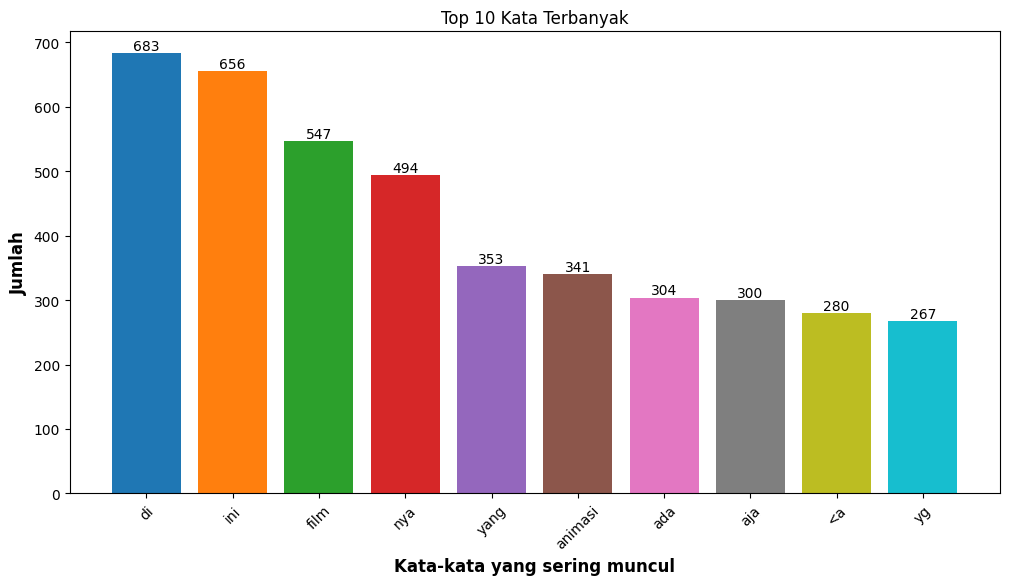

In [19]:
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata yang sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Kata Terbanyak')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom', fontsize=10)

plt.show()

In [20]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [21]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        # hapus tag html
        html_pattern = re.compile(r'<.*?>')
        cleaned_tweet = html_pattern.sub(r'', tweet)

        # Langkah 2: Dekode entitas HTML (misalnya &quot; menjadi ")
        cleaned_tweet = html.unescape(cleaned_tweet)

        # Ganti tanda titik dengan spasi
        cleaned_tweet = cleaned_tweet.replace('.', ' ')

        # Hapus tanda baca lainnya
        punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
        cleaned_tweet = punctuation_pattern.sub(r'', cleaned_tweet)

        return cleaned_tweet
    else:
        return tweet

In [22]:
# fungsi menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F700-\U0001F77F"  # alchemical symbols
            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            "\U0001FA00-\U0001FA6F"  # Chess Symbols
            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "\U00002702-\U000027B0"  # Additional emoticons (Dingbats)
            "\U000024C2-\U0001F251"  # Miscellaneous Symbols and Pictographs
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)

        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [23]:
# fungsi menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-0\s]', ' ', tweet)
  return tweet

In [24]:
# fungsi menghapus angka
def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
  return tweet

In [25]:
# hapus hastag
def hapus_hastag(teks):
  return re.sub(r'#\w+', '', teks).strip()

In [26]:

df['komentarBaru'] = df['textDisplay'].apply(lambda x: remove_html(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_emoji(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_symbols(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_number(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: hapus_hastag(x))
# df['komentarBaru'] = df['komentarBaru'].apply(remove_number)

df.head(10)

,tanggal,jam,username,textDisplay,likeCount,komentarBaru
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank


In [27]:
# menghitung

In [28]:
# proses case folding
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['komentarBaru'].apply(case_folding)
df.head(10)


,tanggal,jam,username,textDisplay,likeCount,komentarBaru,case_folding
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M,apalah ada amk m
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE,asli buriq lebih bagus grafik free fire
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat,berhyenti jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...,tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank,beta buka gudang benderanya hilank


In [29]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

    data  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount']])

In [30]:
# # Unduh dan baca kamus dari GitHub
# url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
# response = requests.get(url)
# file_excel = BytesIO(response.content)
# kamus_data = pd.read_excel(file_excel)

kamus_data = pd.read_csv('kamuskatabaku.csv')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [31]:
# Terapkan fungsi normalisasi
df[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount', 'case_folding','normalisasi']])
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini


In [32]:
df.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
635,2025-08-23,02:07:30,apriyani-j9z,Sumpah gue merinding amat,0,sumpah gue merinding amat,sumpah gue merinding amat
256,2025-08-25,12:12:50,hktchimrionju,,0,,
3339,2025-08-15,16:49:13,amanktamin,hayooo siapa yg liat ada si AK,1,hayooo siapa yg liat ada si ak,hayo siapa yang lihat ada sih aku
4141,2025-08-14,10:49:58,akrostikpuisimusikal,Serahin aja ke pembuat kartun nusa rara Mal...,0,serahin aja ke pembuat kartun nusa rara mal...,serahin saja ke pembuat kartun nusa rara malah...
3373,2025-08-15,14:50:46,jendrimadsunari6545,Film paling terburukkk animasi muka nya bikin ...,0,film paling terburukkk animasi muka nya bikin ...,film paling terburukkk animasi muka nya membua...
1310,2025-08-20,01:38:34,jonniesty_1273,ih jelek,0,ih jelek,ih jelek
3733,2025-08-15,03:01:17,indrasahidun,Kartun apa ini,0,kartun apa ini,kartun apa ini
442,2025-08-24,03:05:25,fandi1887,film animasi Merah Putih One for All meliputi ...,0,film animasi merah putih one for all meliputi ...,film animasi merah putih one for all meliputi ...
3245,2025-08-16,01:09:00,iqbalaakbar9067,Ini settingnya di hutan amazon kan Burungnya m...,0,ini settingnya di hutan amazon kan burungnya m...,ini settingnya di hutan amazon kan burungnya m...
1499,2025-08-19,10:41:59,ariangga_arm6359,Seperti menonton kualitas video p padahal ...,0,seperti menonton kualitas video p padahal ...,seperti menonton kualitas video p padahal saya...


In [33]:
# tokenization
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]"


In [34]:
# proses stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]"


In [36]:
# Proses steaming data
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [38]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]",cartoon masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an...",film keluar miliyaran film game android karakt...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]",burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]",apa amk
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]",jurasik park bagus


In [39]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4640 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4640 non-null   object
 6   normalisasi       4640 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4640 non-null   object
dtypes: int64(1), object(9)
memory usage: 527.8+ KB


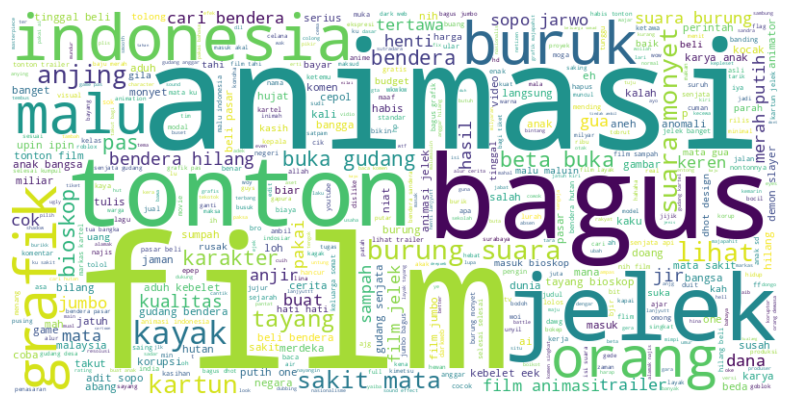

In [40]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','kak','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga','dm'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

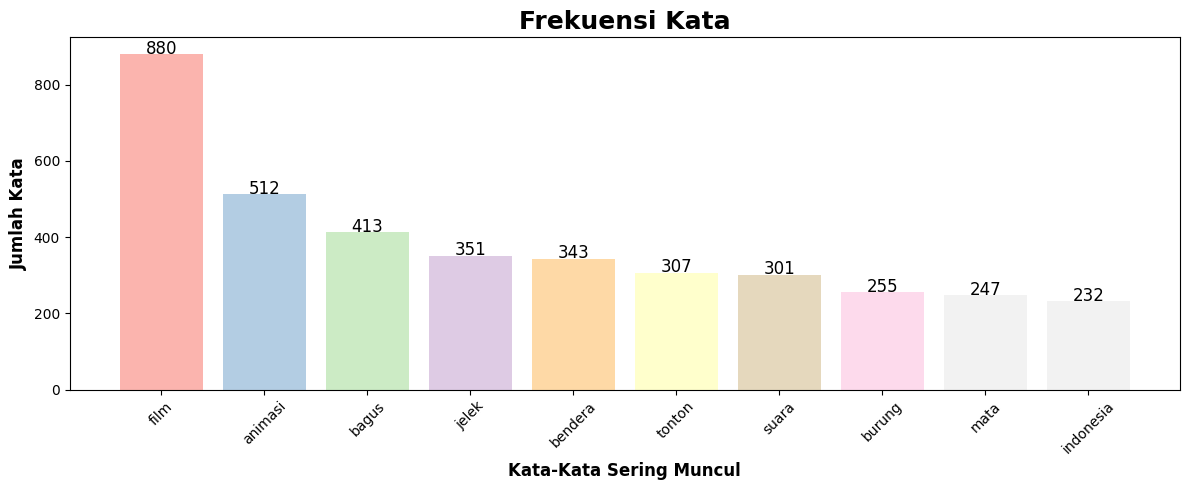

In [41]:
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["stemming"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'kak', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','dm'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [42]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

In [43]:
data = pd.read_csv('Hasil_Preprocessing_Data.csv')

In [44]:
data.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
3718,2025-08-15,00:17:58,ruditranggono7401,milian budged jadinya sampah gini hahahaha,0,milian budged jadinya sampah gini hahahaha,milian budged jadinya sampah begini hahahaha,"['milian', 'budged', 'jadinya', 'sampah', 'beg...","['milian', 'budged', 'sampah', 'hahahaha']",milian budged sampah hahahaha
2573,2025-08-17,03:17:52,safaseftiyana,Mendingan upin ipin dari pada ini,0,mendingan upin ipin dari pada ini,mendingan upin ipin dari pada ini,"['mendingan', 'upin', 'ipin', 'dari', 'pada', ...","['mendingan', 'upin', 'ipin']",mending upin ipin
2551,2025-08-17,04:02:23,nestaadremilan,malaysia boleh klaim film ini,0,malaysia boleh klaim film ini,malaysia boleh klaim film ini,"['malaysia', 'boleh', 'klaim', 'film', 'ini']","['malaysia', 'klaim', 'film']",malaysia klaim film
4195,2025-08-14,07:50:35,tormathic6133,satifiyng banget loh ya,0,satifiyng banget loh ya,satifiyng sangat loh ya,"['satifiyng', 'sangat', 'loh', 'ya']","['satifiyng', 'loh', 'ya']",satifiyng loh ya
3677,2025-08-15,02:01:22,nabilla2213,BIKIN SAKIT MATAAAAAA,0,bikin sakit mataaaaaa,membuat sakit mataaaaaa,"['membuat', 'sakit', 'mataaaaaa']","['sakit', 'mataaaaaa']",sakit mataaaaaa
2064,2025-08-18,03:10:35,uniestdev,Itu gudang Desa Atau Markas Militer,0,itu gudang desa atau markas militer,itu gudang desa atau markas militer,"['itu', 'gudang', 'desa', 'atau', 'markas', 'm...","['gudang', 'desa', 'markas', 'militer']",gudang desa markas militer
1472,2025-08-19,10:57:22,hainnachuu,Kekurangan tapi hilang benderanya Padahal kan...,1,kekurangan tapi hilang benderanya padahal kan...,kekurangan tapi hilang benderanya padahal kan ...,"['kekurangan', 'tapi', 'hilang', 'benderanya',...","['kekurangan', 'hilang', 'benderanya', 'nya', ...",kurang hilang bendera nya bendera hilanganimas...
496,2025-08-23,13:49:39,hauzanirhabnabil-mv5rv,Sound efek ngawur burung menjadi monyet,0,sound efek ngawur burung menjadi monyet,sound efek ngawur burung menjadi monyet,"['sound', 'efek', 'ngawur', 'burung', 'menjadi...","['sound', 'efek', 'ngawur', 'burung', 'monyet']",sound efek ngawur burung monyet
4370,2025-08-14,04:29:10,tictacthok,Render dan animasinya,0,render dan animasinya,render dan animasinya,"['render', 'dan', 'animasinya']","['render', 'animasinya']",render animasi
2158,2025-08-17,21:01:57,alamsyah429,Padahal udah pkok masih aja burik ya,0,padahal udah pkok masih aja burik ya,padahal sudah pkok masih saja buruk ya,"['padahal', 'sudah', 'pkok', 'masih', 'saja', ...","['pkok', 'buruk', 'ya']",pkok buruk ya


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4564 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4564 non-null   object
 6   normalisasi       4563 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4513 non-null   object
dtypes: int64(1), object(9)
memory usage: 362.6+ KB


In [46]:
data.dropna(inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4513 entries, 0 to 4638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4513 non-null   object
 1   jam               4513 non-null   object
 2   username          4513 non-null   object
 3   komentarBaru      4513 non-null   object
 4   likeCount         4513 non-null   int64 
 5   case_folding      4513 non-null   object
 6   normalisasi       4513 non-null   object
 7   tokenize          4513 non-null   object
 8   stopword removal  4513 non-null   object
 9   stemming          4513 non-null   object
dtypes: int64(1), object(9)
memory usage: 387.8+ KB


In [48]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

data['sentiment'] = data['stemming'].apply(determine_sentiment)
data['sentiment'] = replace_none_sentiment(data['sentiment'].tolist())

In [49]:
data

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"['cartoon', 'ini', 'masuk', 'pawagam']","['cartoon', 'masuk', 'pawagam']",cartoon masuk pawagam,Negatif
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"['ini', 'yang', 'katanya', 'film', 'mengeluark...","['film', 'mengeluarkan', 'miliyaran', 'film', ...",film keluar miliyaran film game android karakt...,Negatif
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"['burung', 'nya', 'suara', 'monyet', 'cok']","['burung', 'nya', 'suara', 'monyet', 'cok']",burung nya suara monyet cok,Negatif
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"['apalah', 'ada', 'amk', 'sama']","['apalah', 'amk']",apa amk,Negatif
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"['bahkan', 'jurasik', 'park', 'lebih', 'bagus'...","['jurasik', 'park', 'bagus']",jurasik park bagus,Positif
...,...,...,...,...,...,...,...,...,...,...,...
4634,2025-08-09,12:20:23,justanord1naryman,Dari pemerintah bro membangkang auto hilang,13,dari pemerintah bro membangkang auto hilang,dari pemerintah bro membangkang auto hilang,"['dari', 'pemerintah', 'bro', 'membangkang', '...","['pemerintah', 'bro', 'membangkang', 'auto', '...",perintah bro bangkang auto hilang,Negatif
4635,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"['justanord', 'narymankok', 'xxi', 'trailer', ...","['justanord', 'narymankok', 'xxi', 'trailer', ...",justanord narymankok xxi trailer sih gamasuk x...,Positif
4636,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"['kalau', 'fuluspasti', 'mulus']","['fuluspasti', 'mulus']",fuluspasti mulus,Negatif
4637,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"['prod', 'starlight', 'masuk', 'di', 'xxi', 'l...","['prod', 'starlight', 'masuk', 'xxi', 'loh']",prod starlight masuk xxi loh,Negatif


In [50]:
data['sentiment'].value_counts()

,count
sentiment,
Negatif,3036
Positif,1477


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# split train data dan test data
X = data.drop(['sentiment'], axis=1)
y = data['sentiment']

In [67]:
X

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"['cartoon', 'ini', 'masuk', 'pawagam']","['cartoon', 'masuk', 'pawagam']",cartoon masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"['ini', 'yang', 'katanya', 'film', 'mengeluark...","['film', 'mengeluarkan', 'miliyaran', 'film', ...",film keluar miliyaran film game android karakt...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"['burung', 'nya', 'suara', 'monyet', 'cok']","['burung', 'nya', 'suara', 'monyet', 'cok']",burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"['apalah', 'ada', 'amk', 'sama']","['apalah', 'amk']",apa amk
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"['bahkan', 'jurasik', 'park', 'lebih', 'bagus'...","['jurasik', 'park', 'bagus']",jurasik park bagus
...,...,...,...,...,...,...,...,...,...,...
4634,2025-08-09,12:20:23,justanord1naryman,Dari pemerintah bro membangkang auto hilang,13,dari pemerintah bro membangkang auto hilang,dari pemerintah bro membangkang auto hilang,"['dari', 'pemerintah', 'bro', 'membangkang', '...","['pemerintah', 'bro', 'membangkang', 'auto', '...",perintah bro bangkang auto hilang
4635,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"['justanord', 'narymankok', 'xxi', 'trailer', ...","['justanord', 'narymankok', 'xxi', 'trailer', ...",justanord narymankok xxi trailer sih gamasuk x...
4636,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"['kalau', 'fuluspasti', 'mulus']","['fuluspasti', 'mulus']",fuluspasti mulus
4637,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"['prod', 'starlight', 'masuk', 'di', 'xxi', 'l...","['prod', 'starlight', 'masuk', 'xxi', 'loh']",prod starlight masuk xxi loh


In [68]:
y

,sentiment
0,Negatif
1,Negatif
2,Negatif
3,Negatif
4,Positif
...,...
4634,Negatif
4635,Positif
4636,Negatif
4637,Negatif


In [74]:
# jumlah colom sentiment
data['sentiment'].value_counts()

,count
sentiment,
Negatif,3036
Positif,1477


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# milih model
model = LogisticRegression(max_iter=1000)

In [77]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)


In [78]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['stemming'])


X_test_tfidf = tfidf_vectorizer.transform(X_test['stemming'])

In [79]:
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [80]:
y_pred = model.predict(X_test_tfidf)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [107]:
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))  # pakai balanced
])

grid = GridSearchCV(
    pipeline,
    param_grid={
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'lbfgs']
    },
    cv=5,
    scoring='f1_macro'  # lebih adil untuk dua kelas
)

grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__solver': ['liblinear', 'lbfgs']},
             scoring='f1_macro')

In [108]:
best_model = grid.best_estimator_

In [109]:
y_predik = best_model.predict(X_test_tfidf)

In [110]:
report = classification_report(y_test, y_predik, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
Negatif,0.800000,0.782313,0.791058,588.000000
Positif,0.609756,0.634921,0.622084,315.000000
accuracy,0.730897,0.730897,0.730897,0.730897
macro avg,0.704878,0.708617,0.706571,903.000000
weighted avg,0.733636,0.730897,0.732113,903.000000


In [97]:
report = classification_report(y_test, y_predik, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
Negatif,0.800000,0.782313,0.791058,588.000000
Positif,0.609756,0.634921,0.622084,315.000000
accuracy,0.730897,0.730897,0.730897,0.730897
macro avg,0.704878,0.708617,0.706571,903.000000
weighted avg,0.733636,0.730897,0.732113,903.000000


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [114]:
# hyperparameter

param_grid = [
    {   # KNN
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {   # SVM
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {   # Random Forest
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20]
    },
    {   # Logistic Regression
        'model': [LogisticRegression(max_iter=10000, solver='liblinear')],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2']
    }
]

In [116]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1
)

In [117]:
grid_search.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.67950139 0.67922438 0.67922438        nan 0.67257618
 0.69168975 0.68753463        nan 0.68227147 0.69085873 0.68781163
 0.73130194 0.67811634 0.73130194 0.67811634 0.73268698 0.69473684
 0.73268698 0.68698061 0.73102493 0.71855956 0.73102493 0.71745152
 0.73795014 0.73767313 0.67977839 0.67839335 0.69639889 0.6933518
 0.67950139 0.73213296 0.74764543 0.73407202 0.74293629 0.73379501
 0.73961219 0.73379501]
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7], 'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__n_estimators': [50, 100]},
                         {'model': [LogisticRegression(max_iter=10000,
                                                       solver='liblinear')],
                          'model__C': [0.01, 0.1, 1, 10],
                          'model__penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [119]:
y_pred = grid_search.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.76      0.92      0.83       588
     Positif       0.76      0.45      0.56       315

    accuracy                           0.76       903
   macro avg       0.76      0.69      0.70       903
weighted avg       0.76      0.76      0.74       903



In [122]:
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())  # placeholder, akan ditimpa param_grid
])

In [123]:
param_grid = [
    {   # KNN
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {   # SVM
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {   # Random Forest
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    {   # Logistic Regression
        'model': [LogisticRegression(max_iter=10000, solver='liblinear')],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2'],
        'model__class_weight': [None, 'balanced']
    }
]

In [124]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # lebih stabil
    scoring='f1_macro',  # lebih adil untuk imbalance
    n_jobs=-1
)

In [125]:
grid_search.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.50561689 0.53197144 0.54332544        nan 0.50941533
 0.52009367 0.5289917         nan 0.51222273 0.50287107 0.51112635
 0.69343334 0.40409366 0.69343334 0.40409366 0.69860607 0.40409366
 0.69860607 0.40409366 0.69021352 0.49377596 0.69021352 0.48130557
 0.69010385 0.64496171 0.69010385 0.64421342 0.69085198 0.67724723
 0.69085198 0.68724265 0.65873382 0.66152893 0.66490551 0.66555562
 0.66128232 0.66544627 0.65685758 0.66163976 0.66320495 0.65518652
 0.66203162 0.66499228 0.4050188  0.4050188  0.4050188  0.4050188
 0.4050188  0.4050188  0.4050188  0.4050188  0.4050188  0.4050188
 0.4050188  0.4050188  0.45120685 0.43352003 0.43199583 0.44893369
 0.43605403 0.4345957  0.44036162 0.43091914 0.42933263 0.44036162
 0.42830524 0.43022942 0.51808381 0.68185446 0.62094446 0.69012927
 0.71201163 0.69796927 0.72996662 0.70589802 0.70770795 0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7], 'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()], 'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model_...
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [LogisticRegression(max_iter=10000,
                                                       solver='liblinear')],
                          'model__C': [0.01, 0.1, 1, 10],
                          'model__class_weight': [None, 'balanced'],
                          'model__penalty': ['l1', 'l2']}],
             scoring='f1_macro')

In [126]:
y_pred = grid_search.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.80      0.85      0.82       588
     Positif       0.68      0.61      0.64       315

    accuracy                           0.76       903
   macro avg       0.74      0.73      0.73       903
weighted avg       0.76      0.76      0.76       903



In [129]:
# nyoba smote

In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [131]:
pipe = ImbPipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('smote', SMOTE(random_state=42)),  # <-- tambahkan SMOTE di sini
    ('model', LogisticRegression(class_weight='balanced', max_iter=10000))
])


In [132]:
param_grid = [
    {   # KNN
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {   # SVM
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {   # Random Forest
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    {   # Logistic Regression
        'model': [LogisticRegression(max_iter=10000, solver='liblinear')],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2'],
        'model__class_weight': [None, 'balanced']
    }
]

In [133]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

In [134]:
grid_search.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.52496663 0.60548825 0.60449566        nan 0.52794342
 0.60677196 0.60808963        nan 0.55401588 0.62288985 0.62062258
 0.71130676 0.41702553 0.71130676 0.38447836 0.71440568 0.47328539
 0.71440568 0.44285706 0.70679602 0.64255817 0.70679602 0.64256902
 0.69140418 0.67401503 0.69140418 0.68121416 0.68775686 0.68177982
 0.68775686 0.69641    0.69002116 0.68558292 0.68800975 0.69379656
 0.69143367 0.69134566 0.69280056 0.69726497 0.69581851 0.69515999
 0.69766568 0.69612978 0.67314057 0.68694446 0.68450577 0.67759112
 0.69074962 0.68620877 0.67852225 0.68923307 0.68535045 0.67826755
 0.68973093 0.68476866 0.68851694 0.69072632 0.6911185  0.68727023
 0.69360042 0.69008006 0.69185068 0.69659005 0.69136808 0.69191134
 0.6956378  0.69257237 0.62259507 0.69830114 0.62259507 0.69830114
 0.72389068 0.70712522 0.72605178 0.70712522 0.71954662

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             n_jobs=-1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7], 'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()]...
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [LogisticRegression(max_iter=10000,
                                                       solver='liblinear')],
                          'model__C': [0.01, 0.1, 1, 10],
                          'model__class_weight': [None, 'balanced'],
                          'model__penalty': ['l1', 'l2']}],
             scoring='f1_macro')

In [135]:
y_pred = grid_search.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.80      0.85      0.83       588
     Positif       0.68      0.61      0.65       315

    accuracy                           0.77       903
   macro avg       0.74      0.73      0.74       903
weighted avg       0.76      0.77      0.76       903

